# Get CAISO Ancillary Services

In [1]:
import plotly.express as px

import gridstatus

In [2]:
iso = gridstatus.CAISO()

## Ancillary Services Prices

In [3]:
df = iso.get_as_prices(date="Oct 15, 2022")
df

,Time,Region,Market,Non-Spinning Reserves,Regulation Down,Regulation Mileage Down,Regulation Mileage Up,Regulation Up,Spinning Reserves
0,2022-10-15 00:00:00-07:00,AS_CAISO,DAM,0.00,0.00,0.0,0.0,0.00,0.0
1,2022-10-15 00:00:00-07:00,AS_CAISO_EXP,DAM,0.12,8.01,0.0,0.0,4.90,1.0
2,2022-10-15 00:00:00-07:00,AS_NP26,DAM,0.00,0.00,0.0,0.0,0.00,0.0
3,2022-10-15 00:00:00-07:00,AS_NP26_EXP,DAM,0.00,0.00,0.0,0.0,0.00,0.0
4,2022-10-15 00:00:00-07:00,AS_SP26,DAM,0.00,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
139,2022-10-15 23:00:00-07:00,AS_CAISO_EXP,DAM,0.13,6.49,0.0,0.0,4.75,1.0
140,2022-10-15 23:00:00-07:00,AS_NP26,DAM,0.00,0.00,0.0,0.0,0.00,0.0
141,2022-10-15 23:00:00-07:00,AS_NP26_EXP,DAM,0.00,2.51,0.0,0.0,0.00,0.0
142,2022-10-15 23:00:00-07:00,AS_SP26,DAM,0.00,0.00,0.0,0.0,0.00,0.0


In [11]:
df = iso.get_as_prices(start="Jan 1, 2022", end="Feb 1, 2022")
df

100%|██████████| 31/31 [02:47<00:00,  5.41s/it]


,Time,Region,Market,Non-Spinning Reserves,Regulation Down,Regulation Mileage Down,Regulation Mileage Up,Regulation Up,Spinning Reserves
0,2022-01-01 00:00:00-08:00,AS_CAISO,DAM,0.00,0.00000,0.0,0.0,0.00,0.0
1,2022-01-01 00:00:00-08:00,AS_CAISO_EXP,DAM,0.15,6.34527,0.0,0.0,1.70,1.7
2,2022-01-01 00:00:00-08:00,AS_NP26,DAM,0.00,0.00000,0.0,0.0,0.00,0.0
3,2022-01-01 00:00:00-08:00,AS_NP26_EXP,DAM,0.00,0.75473,0.0,0.0,3.00,0.0
4,2022-01-01 00:00:00-08:00,AS_SP26,DAM,0.00,0.00000,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
4459,2022-01-31 23:00:00-08:00,AS_CAISO_EXP,DAM,0.15,9.15403,0.0,0.0,1.50,1.5
4460,2022-01-31 23:00:00-08:00,AS_NP26,DAM,0.00,0.00000,0.0,0.0,0.00,0.0
4461,2022-01-31 23:00:00-08:00,AS_NP26_EXP,DAM,0.00,0.98700,0.0,0.0,2.24,0.0
4462,2022-01-31 23:00:00-08:00,AS_SP26,DAM,0.00,0.00000,0.0,0.0,0.00,0.0


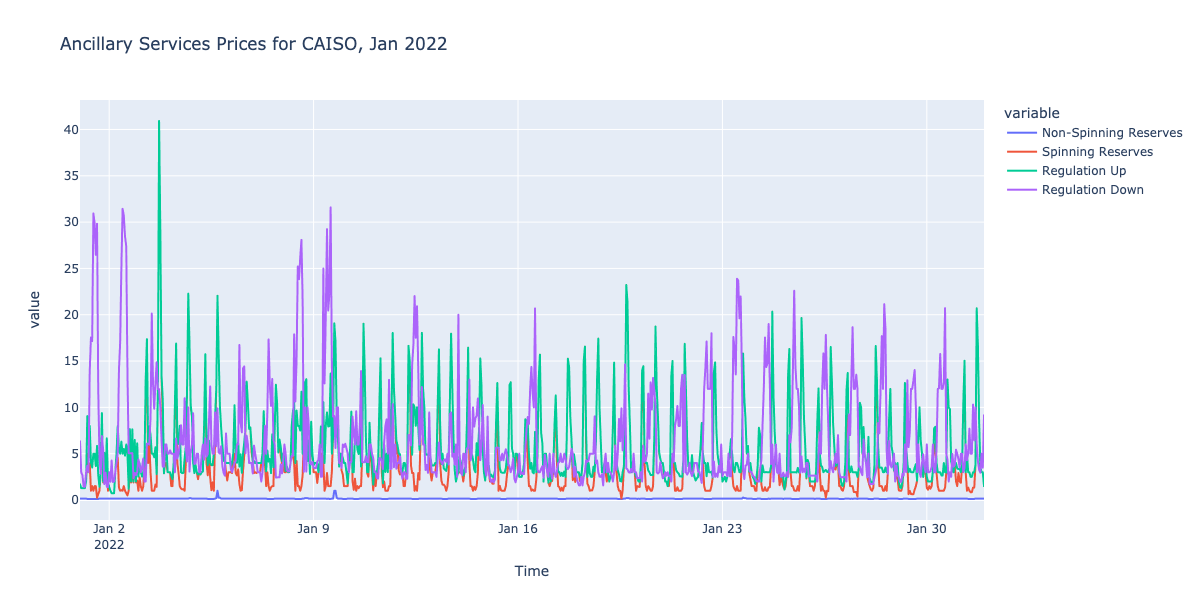

In [17]:
region = df[df["Region"] == "AS_CAISO_EXP"]
region.set_index("Time", inplace=True)

columns = [
    "Non-Spinning Reserves",
    "Spinning Reserves",
    "Regulation Up",
    "Regulation Down",
]
fig = px.line(
    region,
    x=region.index,
    y=columns,
    title="Ancillary Services Prices for CAISO, Jan 2022",
)
fig.show("svg", width=1200, height=600)

## Additional Ancillary Services Data

There is also data about the amount of AS procured

In [6]:
date = "Oct 15, 2022"
market = "DAM"  # or "RTM"
df = iso.get_as_procurement(date, market=market)
df.head()

,Time,Region,Market,Non-Spinning Reserves Procured (MW),Non-Spinning Reserves Self-Provided (MW),Non-Spinning Reserves Total (MW),Non-Spinning Reserves Total Cost,Regulation Down Procured (MW),Regulation Down Self-Provided (MW),Regulation Down Total (MW),...,Regulation Mileage Up Total (MW),Regulation Mileage Up Total Cost,Regulation Up Procured (MW),Regulation Up Self-Provided (MW),Regulation Up Total (MW),Regulation Up Total Cost,Spinning Reserves Procured (MW),Spinning Reserves Self-Provided (MW),Spinning Reserves Total (MW),Spinning Reserves Total Cost
0,2022-10-15 00:00:00-07:00,AS_CAISO,DAM,710.75,5.92,716.67,0.00,690.00,0.0,690.00,...,NaN,NaN,450.00,0.0,450.00,0.0,713.67,3.0,716.67,0.00
1,2022-10-15 00:00:00-07:00,AS_CAISO_EXP,DAM,710.75,5.92,716.67,85.29,690.00,0.0,690.00,...,1709.08,0.0,460.00,0.0,460.00,2254.0,713.67,3.0,716.67,713.67
2,2022-10-15 00:00:00-07:00,AS_NP26,DAM,499.71,2.92,502.63,0.00,270.51,0.0,270.51,...,NaN,NaN,213.91,0.0,213.91,0.0,504.14,0.0,504.14,0.00
3,2022-10-15 00:00:00-07:00,AS_NP26_EXP,DAM,499.71,2.92,502.63,0.00,270.51,0.0,270.51,...,NaN,NaN,223.91,0.0,223.91,0.0,504.14,0.0,504.14,0.00
4,2022-10-15 00:00:00-07:00,AS_SP26,DAM,211.04,3.00,214.04,0.00,419.49,0.0,419.49,...,NaN,NaN,236.09,0.0,236.09,0.0,209.53,3.0,212.53,0.00


### Available columns

In [7]:
df.columns.tolist()

['Time',
 'Region',
 'Market',
 'Non-Spinning Reserves Procured (MW)',
 'Non-Spinning Reserves Self-Provided (MW)',
 'Non-Spinning Reserves Total (MW)',
 'Non-Spinning Reserves Total Cost',
 'Regulation Down Procured (MW)',
 'Regulation Down Self-Provided (MW)',
 'Regulation Down Total (MW)',
 'Regulation Down Total Cost',
 'Regulation Mileage Down Procured (MW)',
 'Regulation Mileage Down Self-Provided (MW)',
 'Regulation Mileage Down Total (MW)',
 'Regulation Mileage Down Total Cost',
 'Regulation Mileage Up Procured (MW)',
 'Regulation Mileage Up Self-Provided (MW)',
 'Regulation Mileage Up Total (MW)',
 'Regulation Mileage Up Total Cost',
 'Regulation Up Procured (MW)',
 'Regulation Up Self-Provided (MW)',
 'Regulation Up Total (MW)',
 'Regulation Up Total Cost',
 'Spinning Reserves Procured (MW)',
 'Spinning Reserves Self-Provided (MW)',
 'Spinning Reserves Total (MW)',
 'Spinning Reserves Total Cost']